# **SMS SPAM DETECTION USING MACHINE LEARNING**
### In this Project we implements a spam detection system using machine learning. It preprocesses SMS data, performs exploratory analysis, and trains various classifiers, including ensemble methods, to classify messages as spam or ham, ultimately saving the model for future use and deploy the model on streamlit to make a webapp for better look

# **Importing Neccesary Libraries**

In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Importing Dataset in df**

In [417]:
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [418]:
df.shape

(5572, 5)

In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# **Droping unusual data and keeping only that is needed**

In [420]:
columns_to_keep=["v1","v2"]
df=df[columns_to_keep]
df.sample(5)

,v1,v2
124,ham,ÌÏ predict wat time Ì_'ll finish buying?
207,ham,"Aight yo, dats straight dogg"
2797,ham,Purity of friendship between two is not about ...
4421,ham,MMM ... Fuck .... Merry Christmas to me
459,ham,Going thru a very different feeling.wavering d...


In [421]:
# renaming the columns
df.rename(columns={"v1":"target","v2":"text"},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [422]:
df.isnull().sum()

target    0
text      0
dtype: int64

## **Converting the Categorical Column to numeric**

In [423]:
# Encoding the categorical data
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

df["target"]=encoder.fit_transform(df["target"])

In [424]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## **Removing dublicates from data**

In [425]:
df.duplicated().sum()

403

In [426]:
df.drop_duplicates(keep="first",inplace=True)

In [427]:
df.duplicated().sum()

0

In [428]:
df.shape

(5169, 2)

In [429]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

# **Performing Exploratory Data Analysis to get Insights about data**
### EDA is a process of summarizing and visualizing the main characteristics of a dataset to understand its underlying structure and patterns. It helps in identifying relationships between variables, outliers, and missing values.




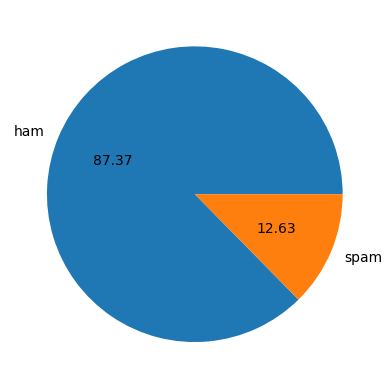

In [430]:
# representing target using pie chart
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [431]:
# Data is imbalanced
# We need to oversample the minority class


In [432]:
import nltk

In [433]:
# counting num of characters
df["num_of_char"]=df["text"].apply(len) # Counts the length of characters in each row and store in new column

In [434]:
df.head()

,target,text,num_of_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [435]:
# counting num of words
df["num_of_words"]=df["text"].apply(lambda x :len(nltk.word_tokenize(x))) # Counts the length of words in each row and store in new column

In [436]:
df.head()

,target,text,num_of_char,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [437]:
# counting num of words
df["num_of_sentences"]=df["text"].apply(lambda x :len(nltk.sent_tokenize(x)))# Counts the length of sentences in each row and store in new column

In [438]:
df.head()

,target,text,num_of_char,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [439]:
df.describe()

,target,num_of_char,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [440]:
# ham messages 
df[df["target"]==0][["num_of_char","num_of_words","num_of_sentences"]].describe() # getting info about the new columns for target 0

,num_of_char,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [441]:
# spam messages
df[df["target"]==1][["num_of_char","num_of_words","num_of_sentences"]].describe()

,num_of_char,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


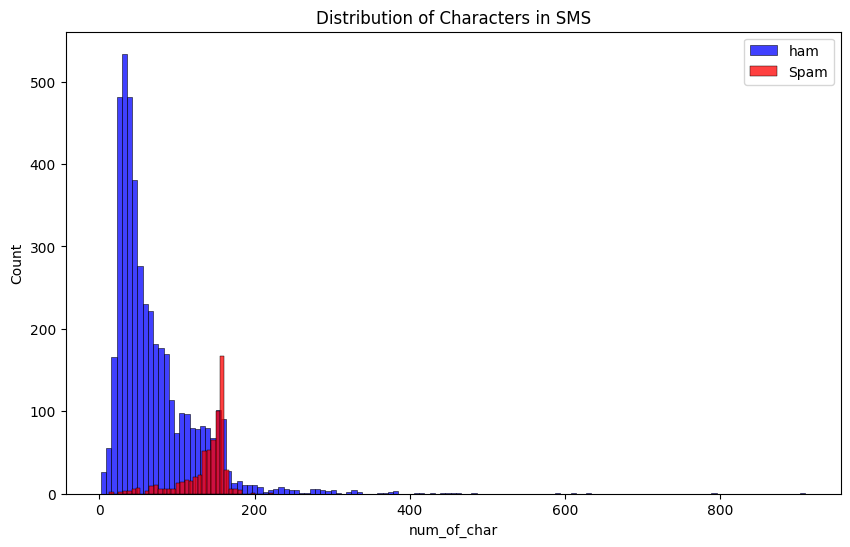

In [442]:
# plotting histplot to get the visualization of character counts in ham and spam
plt.figure(figsize=(10,6))
sns.histplot(df[df["target"]==0]["num_of_char"],color="blue")
sns.histplot(df[df["target"]==1]["num_of_char"],color="red")
plt.title("Distribution of Characters in SMS")
plt.legend(["ham","Spam"])
plt.show() 

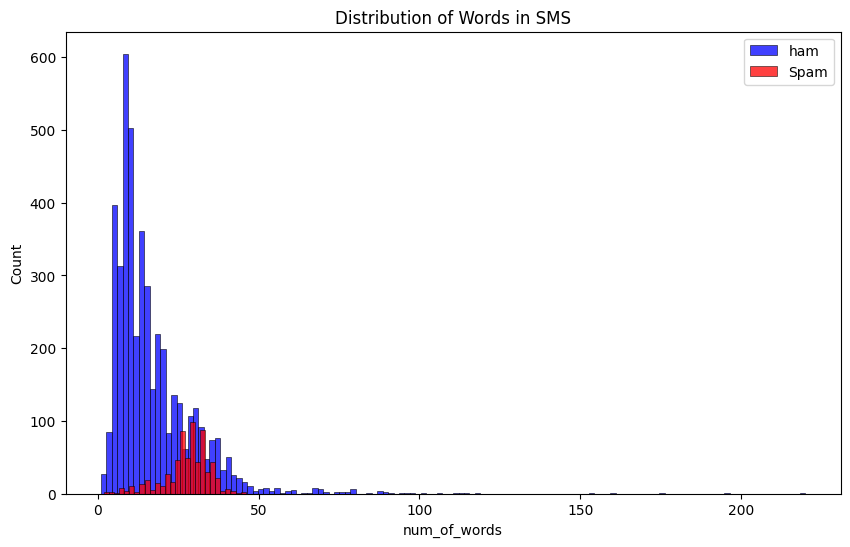

In [443]:
# plotting histplot to get the visualization of words counts in ham and spam
plt.figure(figsize=(10,6))
sns.histplot(df[df["target"]==0]["num_of_words"],color="blue")
sns.histplot(df[df["target"]==1]["num_of_words"],color="red")
plt.title("Distribution of Words in SMS")
plt.legend(["ham","Spam"])
plt.show() 

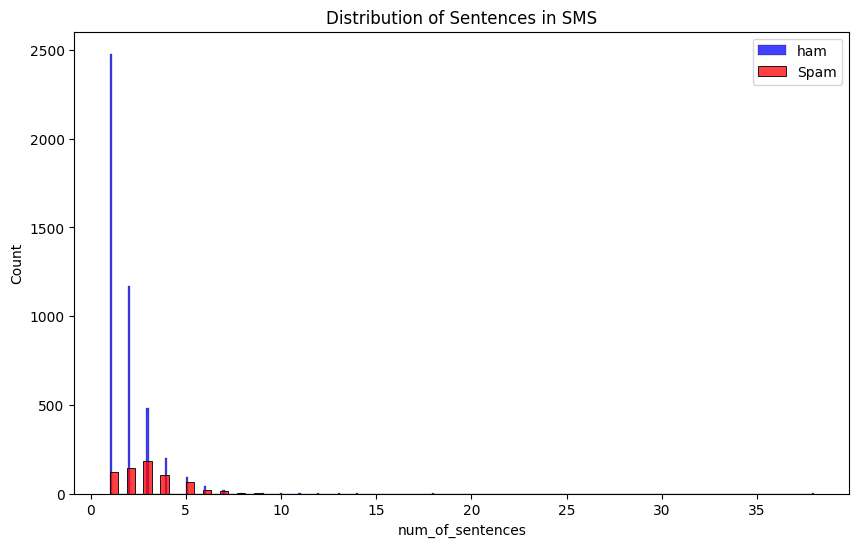

In [444]:
# plotting histplot to get the visualization of sentences counts in ham and spam
plt.figure(figsize=(10,6))
sns.histplot(df[df["target"]==0]["num_of_sentences"],color="blue")
sns.histplot(df[df["target"]==1]["num_of_sentences"],color="red")
plt.title("Distribution of Sentences in SMS")
plt.legend(["ham","Spam"])
plt.show() 

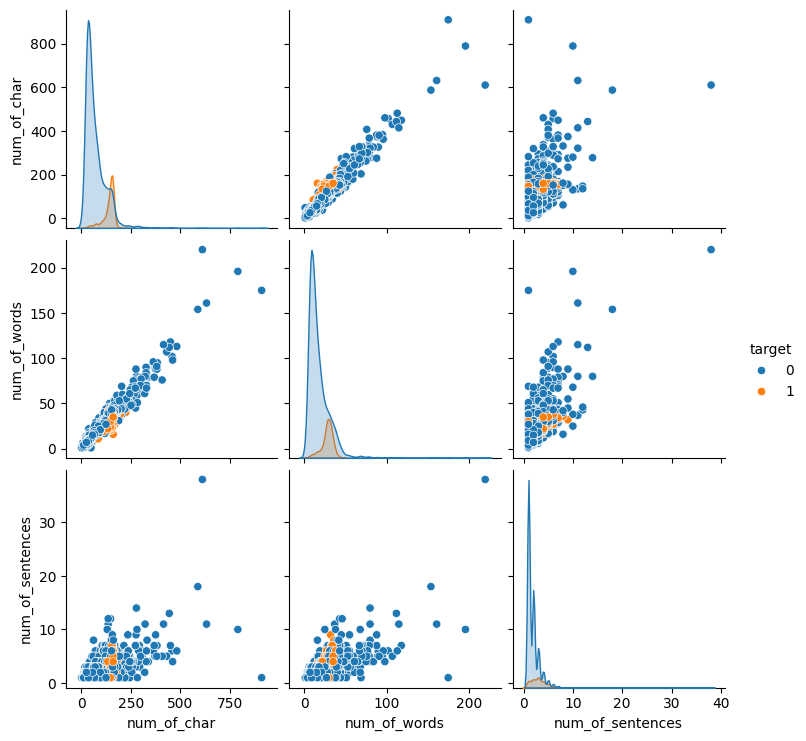

In [445]:
# ploting pairplot to display relationships between multiple variables in a dataset.
sns.pairplot(hue="target",data=df)
plt.show()

<Axes: >

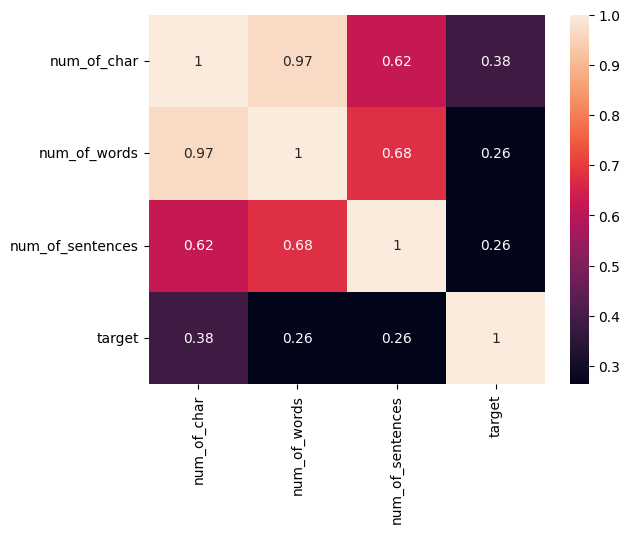

In [446]:
# heatmap gives the coorelation between each features in dataset 
sns.heatmap(df[["num_of_char","num_of_words","num_of_sentences","target"]].corr(),annot=True)
# numofcharacters feature have high coorelation with target so we use only num of char in our dataset if nessary for model 

# **Text Cleaning Using NLP Techniques**

In [447]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
import re
import string

In [449]:
# Text Preprocessing
lemmatizer=WordNetLemmatizer()
def clean_text(text):
    text=text.lower() # convert text to lower
    
    text=re.sub(r"@[\w-]+","",text) # remove mentiond
    
    text=text.translate(str.maketrans("","",string.punctuation)) # remove punctuation marks
    
    text=text.strip() # removing unusual whitespaces
    
    text=word_tokenize(text) # tokenize words
    
    text=[word for word in text if word not in stopwords.words("english")] # remove stop words

    tagged_text=pos_tag(text)
    
    lemmatized_text = [lemmatizer.lemmatize(word, pos=tag[0].lower()[0]) 
                       if tag[0].lower()[0] in ['a', 'n', 'v'] 
                       else lemmatizer.lemmatize(word)
                        for word, tag in tagged_text ]# lemmatizing (converting words to its root form e.g drinking to drink)

    return " ".join(lemmatized_text)

In [450]:
text="Hi how are you @ALi , ##20 dancing ali and eating foods and drinking and "
print(clean_text(text))

hi 20 dance ali eat food drink


In [451]:
df["text"]=df["text"].apply(clean_text)

In [452]:
df.head()

,target,text,num_of_char,num_of_words,num_of_sentences
0,0,go jurong point crazy available bugis n great ...,111,24,2
1,0,ok lar joking wif u oni,29,8,2
2,1,free entry 2 wkly comp win fa cup final tkts 2...,155,37,2
3,0,u dun say early hor u c already say,49,13,1
4,0,nah dont think go usf life around though,61,15,1


# **Using WordCloud to get insight of words that are frequently used in messages(ham/spam)**

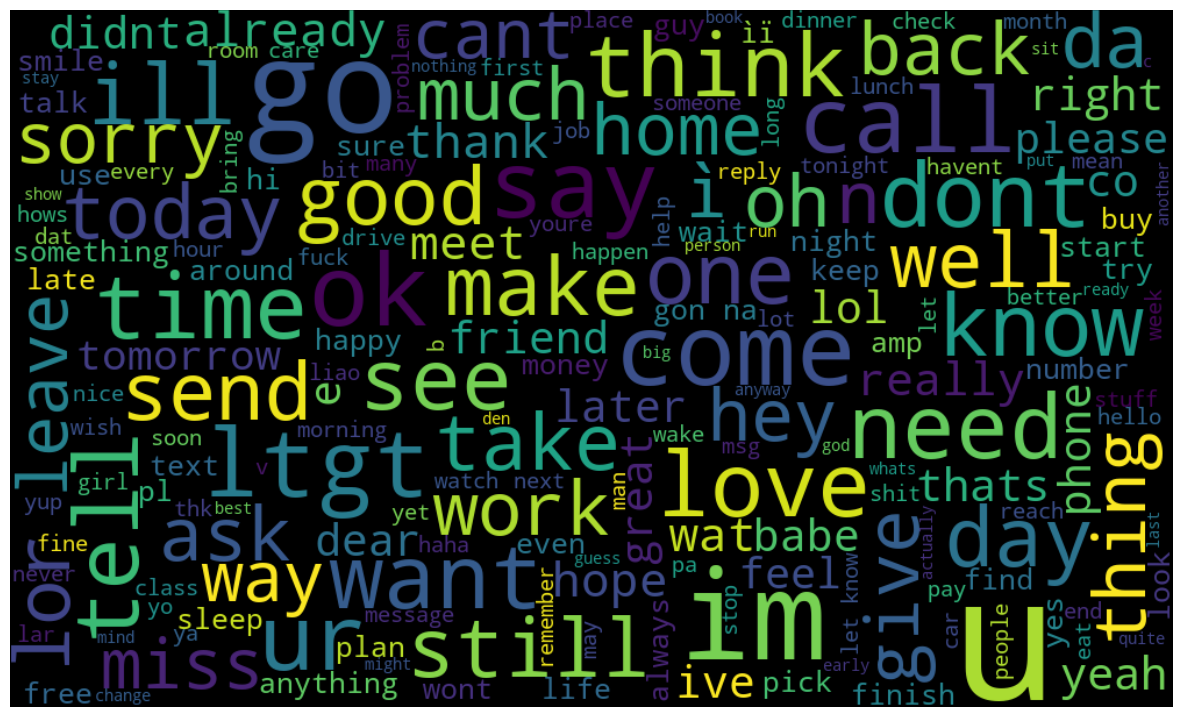

In [454]:
from wordcloud import WordCloud
# Join the messages into a single string for 'ham' messages
ham_messages = " ".join(word for word in df["text"][df["target"] == 0].astype(str))

# Create a WordCloud instance without passing the DataFrame
wc = WordCloud(width=1000, height=600, max_font_size=150)

# Generate the word cloud using the concatenated ham messages
wc.generate(ham_messages)

# Plot the WordCloud
plt.figure(figsize=(15, 12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


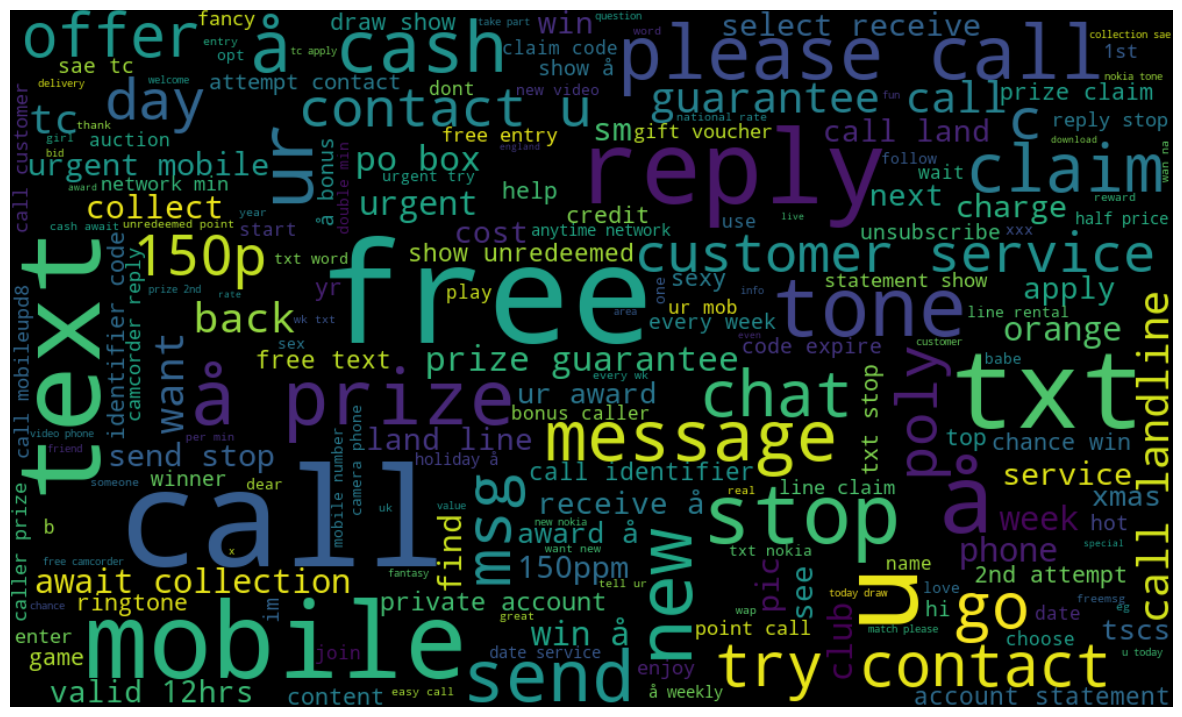

In [455]:

# Join the messages into a single string for 'spam' messages
spam_messages = " ".join(word for word in df["text"][df["target"] == 1].astype(str))

# Create a WordCloud instance without passing the DataFrame
wc = WordCloud(width=1000, height=600, max_font_size=120)

# Generate the word cloud using the concatenated spam messages
wc.generate(spam_messages)

# Plot the WordCloud
plt.figure(figsize=(15, 12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


# **Getting 30 Mostly used words that are used in ham / Spam messages**

In [463]:
spam_corpus=[]# Contain list of word in spam messages
for msg in df["text"][df["target"]==1].tolist():# Get each message from the list
    for word in msg.split():# get each word from the message
        spam_corpus.append(word)# Adding each word to spam corpus


In [464]:
spam_corpus

['free',
 'entry',
 '2',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receive',
 'entry',
 'questionstd',
 'txt',
 'ratetcs',
 'apply',
 '08452810075over18s',
 'freemsg',
 'hey',
 'darling',
 '3',
 'week',
 'word',
 'back',
 'id',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'å£150',
 'rcv',
 'winner',
 'value',
 'network',
 'customer',
 'select',
 'receivea',
 'å£900',
 'prize',
 'reward',
 'claim',
 'call',
 '09061701461',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobile',
 '11',
 'month',
 'u',
 'r',
 'entitle',
 'update',
 'latest',
 'colour',
 'mobile',
 'camera',
 'free',
 'call',
 'mobile',
 'update',
 'co',
 'free',
 '08002986030',
 'six',
 'chance',
 'win',
 'cash',
 '100',
 '20000',
 'pound',
 'txt',
 'csh11',
 'send',
 '87575',
 'cost',
 '150pday',
 '6days',
 '16',
 'tsandcs',
 'apply',
 'reply',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'members

In [465]:
len(spam_corpus)# print the length of num of characters in spam_corpus

10814

In [466]:
# using counter to count the frequency of each word in the spam_corpus
from collections import Counter
spam_words_df=pd.DataFrame(Counter(spam_corpus).most_common(30),columns=["Words","Counts"])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3380\1256994178.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=spam_words_df,x="Words",y="Counts",palette="viridis",legend=False)


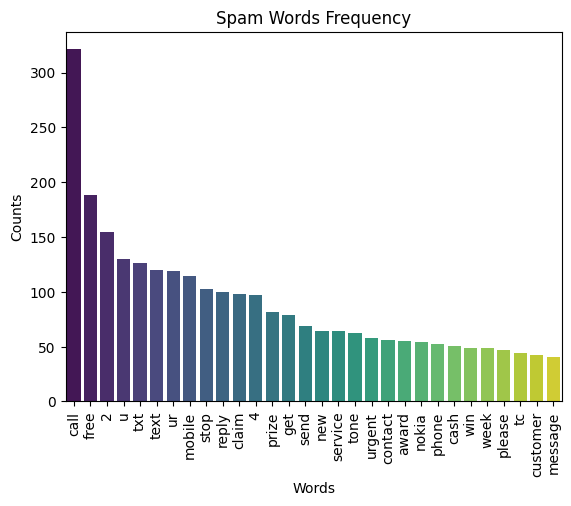

In [467]:
sns.barplot(data=spam_words_df,x="Words",y="Counts",palette="viridis",legend=False)
plt.title("Spam Words Frequency")
plt.xticks(rotation="vertical")
plt.show()

In [468]:
ham_corpus=[]
for msg in df["text"][df["target"]==0].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

37021

In [469]:
from collections import Counter
ham_words_df=pd.DataFrame(Counter(ham_corpus).most_common(30),columns=["Words","Counts"])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3380\2222499870.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ham_words_df,x="Words",y="Counts",palette="viridis",legend=False)


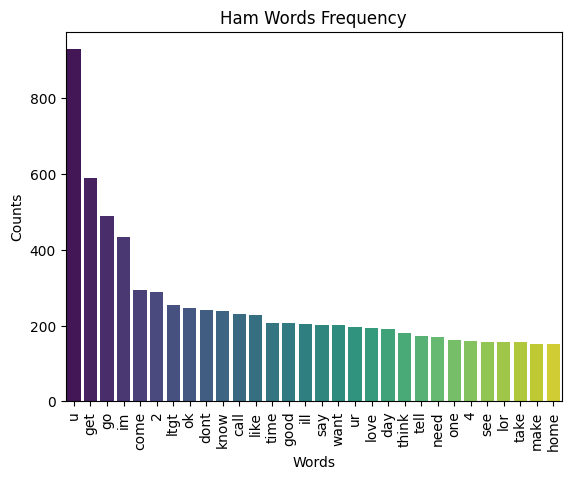

In [470]:
sns.barplot(data=ham_words_df,x="Words",y="Counts",palette="viridis",legend=False)
plt.title("Ham Words Frequency")
plt.xticks(rotation="vertical")
plt.show()

# **Converting text to vectors**

In [717]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [718]:
#X=cv.fit_transform(df["text"]).toarray()
X=tfidf.fit_transform(df["text"]).toarray() # using tfidf vectorizer to convert text into vectors

In [719]:
X.shape

(5169, 3000)

In [720]:
X[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [721]:
y=df["target"].values

In [722]:
y

array([0, 0, 1, ..., 0, 0, 0])

# **Spliting data into training and testing for model training**

In [723]:
from sklearn.model_selection import train_test_split

In [724]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [725]:
print(X_train.shape)
print(y_train.shape)

(4135, 3000)
(4135,)


# **Importing Machine learning Models for Classification Purpose**

In [753]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [755]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
lr=LogisticRegression()
svm=SVC()
rfc=RandomForestClassifier(n_estimators=50,random_state=42)
etc=ExtraTreesClassifier(n_estimators=50,random_state=42)

In [756]:
# Creating a dictionary to hold the model names and their instances
models = {
    "GaussianNB": gnb,
    "MultinomialNB": mnb,
    "BernoulliNB": bnb,
    "LogisticRegression": lr,
    "SVM": svm,
    "RandomForest": rfc,
    "ExtraTreesClassifier": etc
}

In [757]:
# Function to train a model and evaluate its performance
def train_model(model, X_train, X_test, y_train, y_test):
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    return accuracy, precision, recall

In [758]:
# Lists to store performance metrics for each model
accuracy_scores = []
precision_scores = []
recall_scores = []


# Iterate through each model, train, and evaluate it
for name, model in models.items():
    accuracy, precision, recall = train_model(model, X_train, X_test, y_train, y_test)
    
    # Print performance metrics for each model
    print("For", name)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    
    # Append metrics to respective lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)

For GaussianNB
Accuracy: 0.8665377176015474
Precision: 0.5146443514644351
Recall: 0.8482758620689655
For MultinomialNB
Accuracy: 0.9738878143133463
Precision: 1.0
Recall: 0.8137931034482758
For BernoulliNB
Accuracy: 0.9748549323017408
Precision: 0.9917355371900827
Recall: 0.8275862068965517
For LogisticRegression
Accuracy: 0.9535783365570599
Precision: 0.944954128440367
Recall: 0.7103448275862069
For SVM
Accuracy: 0.9748549323017408
Precision: 0.9917355371900827
Recall: 0.8275862068965517
For RandomForest
Accuracy: 0.9700193423597679
Precision: 0.9913793103448276
Recall: 0.7931034482758621
For ExtraTreesClassifier
Accuracy: 0.9748549323017408
Precision: 0.9917355371900827
Recall: 0.8275862068965517


In [759]:
# Create a DataFrame to summarize model performance
performance_df = pd.DataFrame({
    "Algorithms": models.keys(),
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores
})

In [760]:
# Sort the DataFrame by Precision
performance_df.sort_values(by="Precision", ascending=False)

,Algorithms,Accuracy,Precision,Recall
1,MultinomialNB,0.973888,1.000000,0.813793
2,BernoulliNB,0.974855,0.991736,0.827586
4,SVM,0.974855,0.991736,0.827586
6,ExtraTreesClassifier,0.974855,0.991736,0.827586
5,RandomForest,0.970019,0.991379,0.793103
3,LogisticRegression,0.953578,0.944954,0.710345
0,GaussianNB,0.866538,0.514644,0.848276


In [761]:
# Melt the DataFrame for easier plotting with seaborn
performance_df_melted = performance_df.melt(id_vars="Algorithms", var_name="Metric", value_name="value")

In [762]:
performance_df_melted

,Algorithms,Metric,value
0,GaussianNB,Accuracy,0.866538
1,MultinomialNB,Accuracy,0.973888
2,BernoulliNB,Accuracy,0.974855
3,LogisticRegression,Accuracy,0.953578
4,SVM,Accuracy,0.974855
5,RandomForest,Accuracy,0.970019
6,ExtraTreesClassifier,Accuracy,0.974855
7,GaussianNB,Precision,0.514644
8,MultinomialNB,Precision,1.000000
9,BernoulliNB,Precision,0.991736


<Figure size 1000x800 with 0 Axes>

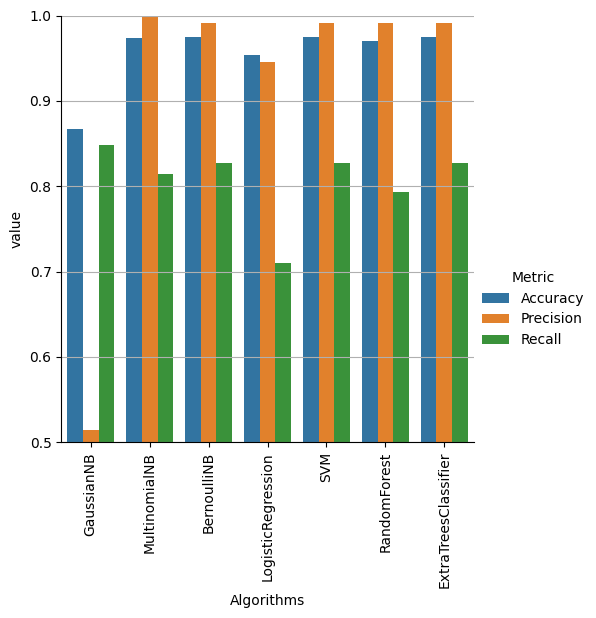

In [763]:
# Plot the performance metrics for each model
plt.figure(figsize=(10, 8))
sns.catplot(x="Algorithms", y="value", hue="Metric", data=performance_df_melted, kind="bar", height=5)
plt.grid(axis="y")
plt.ylim(0.5, 1.0)  # Set y-axis limits for better visibility
plt.xticks(rotation="vertical")  # Rotate x-axis labels for readability
plt.show()

# **Using Voting Classifier**
### A Voting Classifier combines the predictions of multiple models to improve classification accuracy. It aggregates the outputs using a specified voting method (e.g., soft or hard voting), leveraging the strengths of each model to make a final prediction.

In [768]:
from sklearn.ensemble import VotingClassifier
mnb=MultinomialNB()
bnb=BernoulliNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=42)

In [772]:
# Voting Classifier: Combine predictions from multiple models
voting=VotingClassifier(estimators=[("mnb",mnb),("bnb",bnb),("etc",etc)],voting="soft")

In [773]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('mnb', MultinomialNB()), ('bnb', BernoulliNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=42))],
                 voting='soft')

In [774]:
# Evaluating the voting classifier
y_pred=voting.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)

print(accuracy)
print(precision)
print(recall)

0.9748549323017408
0.9917355371900827
0.8275862068965517


# **Stacking Classifier**
### A Stacking Classifier combines multiple base models to enhance predictive performance by using their individual strengths. It trains a final estimator on the predictions of the base models, allowing for more complex decision-making and often resulting in improved accuracy compared to single models.

In [782]:
from sklearn.ensemble import StackingClassifier

In [781]:
# Stacking Classifier: Using multiple models to predict and a final estimator to make the final decision
estimaters=[("mnb",mnb),("bnb",bnb),("etc",etc)]
final_estimater=SVC()

In [783]:
clf=StackingClassifier(estimators=estimaters,final_estimator=final_estimater)

In [784]:
clf.fit(X_train,y_train)

StackingClassifier(estimators=[('mnb', MultinomialNB()), ('bnb', BernoulliNB()),
                               ('etc',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=42))],
                   final_estimator=SVC())

In [785]:
# Evaluating the stacking classifier
y_pred=clf.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)

print(accuracy)
print(precision)
print(recall)

0.9835589941972921
0.9923076923076923
0.8896551724137931


In [ ]:
# Note: The stacking classifier is chosen for its overall performance advantage

# **Making Prediction On Our Message**
## We have to do the same step that we perform to train the model 
- ### Text Preprocessing
- ### Text Vectorization
- ### Get Predction from Model

## **We first Perform Text Preprocessing using clean_text function**

In [ ]:
# Function to clean and preprocess the input text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove mentions (e.g., @username)
    text = re.sub(r"@[\w-]+", "", text)
    
    # Remove punctuation marks
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # Strip unusual whitespaces
    text = text.strip()
    
    # Tokenize words
    text = word_tokenize(text)
    
    # Remove stop words
    text = [word for word in text if word not in stopwords.words("english")]

    # Part-of-speech tagging
    tagged_text = pos_tag(text)
    
    # Lemmatize words based on their POS tags
    lemmatized_text = [
        lemmatizer.lemmatize(word, pos=tag[0].lower()[0]) 
        if tag[0].lower()[0] in ['a', 'n', 'v'] 
        else lemmatizer.lemmatize(word)
        for word, tag in tagged_text ]

    # Return the cleaned and lemmatized text as a single string
    return " ".join(lemmatized_text)



## **After cleaning do Vectorization and give that vectorized text to get prediction**

In [ ]:
# Create a text area for user input
input_text = "Congratulation you got a free prize click on the link to get it"

text = clean_text(input_text)

# Transform the text using the TF-IDF vectorizer
vectorized_text = tfidf.transform([text])

# Make a prediction using the trained model
prediction = model.predict(vectorized_text)[0]

# Display the result based on the prediction
if prediction == 0:
    print("Not Spam")
else:
    print("Spam")


# **Saving the model and Vectorizer for future use**

In [ ]:
import pickle as pkl
pkl.dump(tfidf,open("Vectorizer.pkl","wb"))
pkl.dump(clf,open("Model.pkl","wb"))

# **Conclusion:**
- ### Developed a spam detection system using a comprehensive dataset.
- ### Preprocessed data and employed multiple machine learning algorithms, including Naive Bayes and Logistic Regression.
- ### Implemented ensemble methods like Voting and Stacking Classifiers for improved performance.
- ### Achieved the highest accuracy and precision with the Stacking Classifier.
- ### Visualizations highlighted the strengths and weaknesses of each model.
- ### Emphasized the importance of feature extraction and model selection, with future scope for exploring deep learning techniques.